<a href="https://colab.research.google.com/github/TarcizoC/Faculdade/blob/main/ProvaEletronicos1_Estudos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudos

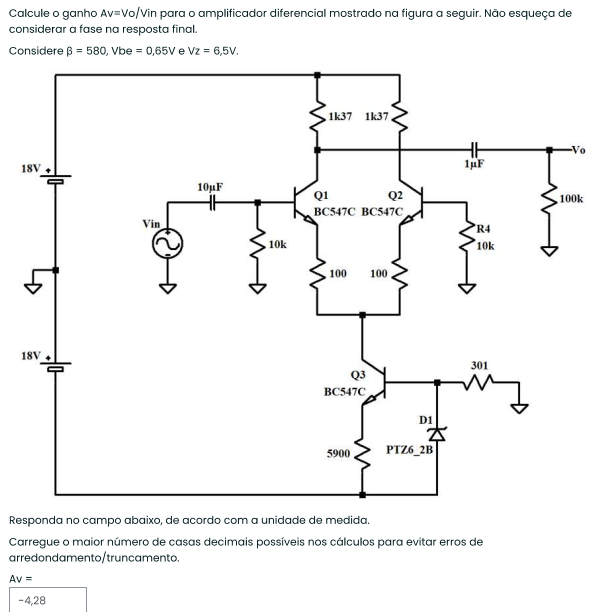

In [ ]:
Vf = 18

Rb = 10e3
Rc = 1.37e3
Re = 100
Rl = 100e3

Rfe = 5900
Rfb = 301

beta = 580
Vbe = 0.65
Vz = 6.5

If = (Vz - Vbe) / Rfe * beta/(beta+1)
print("If: ", If)

Ie = If/2
print("Ie: ", Ie)

Ic = Ie * beta / (beta + 1)
print("Ic: ", Ic)

re_linha = 26/(Ic*1e3)
print("re_linha: ", re_linha)

''' Desenvolvimento do ganho
Vin = 2*Ie*Re + 2*Ib**beta*re_linha + Ib*Rb

Ie = Ib * (beta + 1)

Vin = 2* Ib * (beta + 1) *Re + 2*Ib*re_linha*beta + Ib*Rb
Ib = Vin / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)

Ic = Ib * beta
Ic = beta * Vin / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)

Vo = -Ic * Rc
Vo = - beta * Vin * Rc / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)

Av = Vo / Vin
Av = - beta * Vin * Rc / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)  /  Vin
Av = - beta * Rc / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)
'''

Av = - beta * Rc / (2*(beta+1)*Re + 2*re_linha*beta + Rb)
print("Ganho de tensão: ", Av)

#Av = - Rc / (2*beta*(Re + re_linha) + Rb/beta)
#print("Ganho de tensão: ", Av)

If:  0.00098981883952274
Ie:  0.00049490941976137
Ic:  0.0004940575963194399
re_linha:  52.6254432553838
Ganho de tensão:  -4.243626361334783


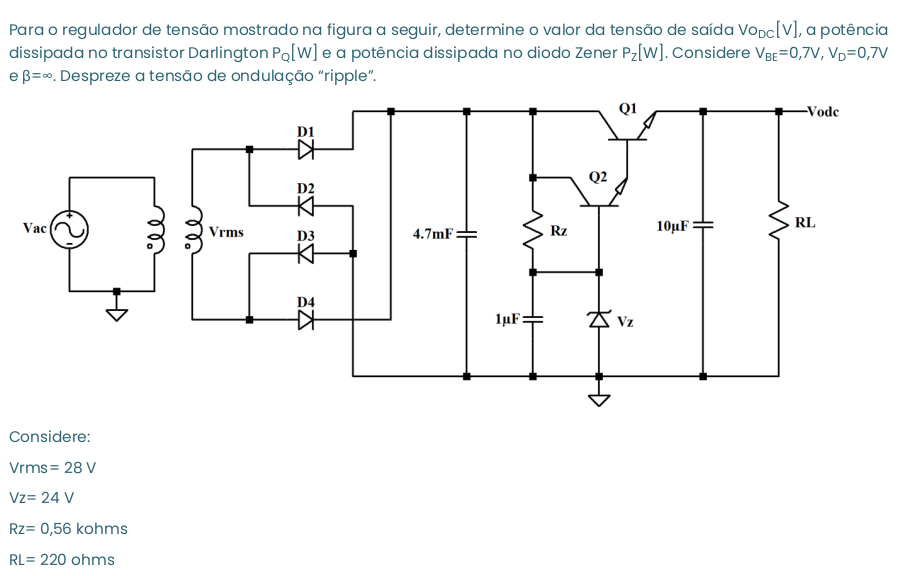

In [ ]:
import numpy as np

Vrms = 28
Vz = 24
Rz = 560
Rl = 220

Vbe = 0.7
Vd = 0.7

# Tensão de saída
#Zenner para cima
Vodc = Vz - 2*Vbe
print("Vodc: ", Vodc)

# Potência no transistor
Il = Vodc/Rl
print("Il: ", Il)

Vindc = Vrms*np.sqrt(2) - 2*Vd
print("Vindc: ", Vindc)

Pq = (Vindc - Vodc) * Il
print("Pq: ", Pq)

# Potência no zenner
Irz = (Vindc - Vz)/Rz
print("Irz: ", Irz)

Pz = Vz * Irz
print("Pz: ", Pz)

Vodc:  22.6
Il:  0.10272727272727274
Vindc:  38.19797974644666
Pq:  1.6023379194077025
Irz:  0.0253535352615119
Pz:  0.6084848462762855


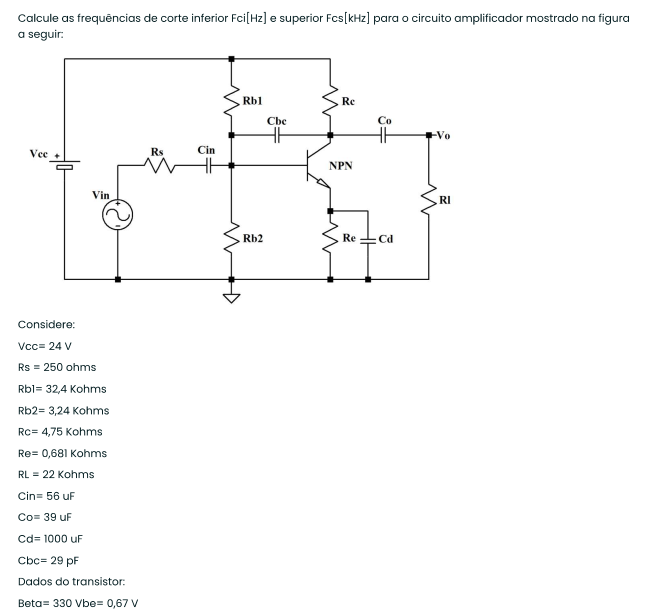

In [ ]:
def paralelo(R1, R2):
  return 1/(1/R1 + 1/R2)

Vf = 24
Rs = 250
Rb1 = 32.4e3
Rb2 = 3.24e3
Rc = 4.75e3
Re = 0.681e3
Rl = 22e3
Cin = 56e-6
Co = 39e-6
Cd = 1000e-6
Cbc = 29e-12

beta = 330
Vbe = 0.67

print("Polarização DC transistor\n")

Vb = Vf * Rb2/(Rb1+Rb2)
Ie = (Vb - Vbe)/Re
Ic = beta/(beta+1) * Ie
re_linha = 26/(Ic*1e3)
print("re_linha: ", re_linha)


print("\nFrequencia de corte inferior\n")
#Malha de entrada
Zin = paralelo(paralelo(Rb1, Rb2), beta*re_linha)
print("Zin: ", Zin)
Rth_i = Rs + Zin
print("Rth_i: ", Rth_i)
fci = 1/(2*np.pi*Cin*Rth_i)
print("--------------")
print("fci_i: ", fci)
#Malha de saída
Rth_o = paralelo(Rc, Rl)
#Zin_o = paralelo(paralelo(paralelo(Rb1, Rb2), Rs), beta*re_linha)
#Rth_o = paralelo(paralelo(Rc, Rl), Zin_o)
fco = 1/(2*np.pi*Co*Rth_o)
print("fco: ", fco)
#Desvio
Rs_linha = paralelo(paralelo(Rb1, Rb2), Rs)
Rth_d = paralelo(Re, Rs_linha/beta + re_linha)
fcd = 1/(2*np.pi*Cd*Rth_d)
print("fcd: ", fcd)
print("--------------")
print("Pegar o maior dos três acima")

print("\nGanho do amplificador\n")


Av = - paralelo(Rc, Rl)/re_linha
print("Av: ", Av)


print("\nFrequencia de corte superior\n")
print("Entrou na margem de erro de menos de 1%, conferir se cair com ela")

Cmi = Cbc*(1-Av)
Ci = Cmi
Rth_i = paralelo(paralelo(paralelo(Rb1, Rb2), Rs), beta*re_linha)
#Rth_i = paralelo(paralelo(Rc, Rl), Zin_linha)
Fci = 1/(2*np.pi*Ci*Rth_i)
print("Fci: ", Fci)

Cmo = Cbc*(1-1/Av)
Co = Cmo
Rth_o = paralelo(Rc, Rl)
Fco = 1/(2*np.pi*Co*Rth_o)
print("Fco: ", Fco)

Polarização DC transistor

re_linha:  11.747215874924834

Frequencia de corte inferior

Zin:  1673.7370180475882
Rth_i:  1923.7370180475882
--------------
fci_i:  1.4773602257219296
fco:  1.0446312667668263
fcd:  13.021837050706589
--------------
Pegar o maior dos três acima

Ganho do amplificador

Av:  -332.550461119347

Frequencia de corte superior

Entrou na margem de erro de menos de 1%, conferir se cair com ela
Fci:  75644.79674115594
Fco:  1400637.141625997


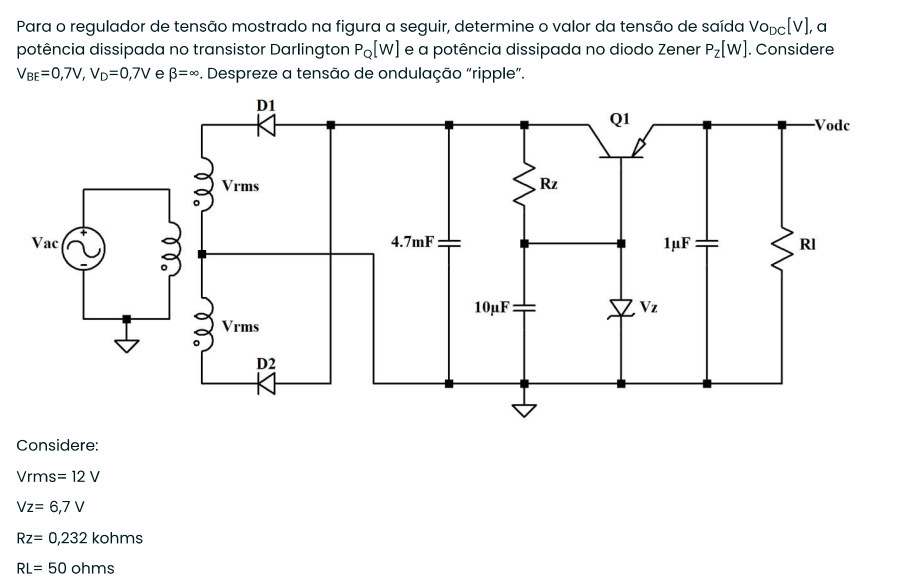

In [ ]:
Vrms = 12
Vz = 6.7
Rz = 0.232e3
Rl = 50

Vbe = 0.7
Vd = 0.7

Vodc = -Vz + Vbe
print("Vodc: ", Vodc)

Il = Vodc/Rl
print("Il: ", Il)

Vidc = -(Vrms * np.sqrt(2) - Vd)
print("Vidc: ", Vidc)

Irz = (Vidc - (-Vz))/Rz
print("Irz: ", Irz)

Pq = (Vidc - Vodc) * Il
print("Pq: ", Pq)

Pz = -Vz * Irz
print("Pz: ", Pz)

Vodc:  -6.0
Il:  -0.12
Vidc:  -16.270562748477143
Irz:  -0.04125242563998769
Pq:  1.2324675298172572
Pz:  0.2763912517879175


# PROVA PESSOAL

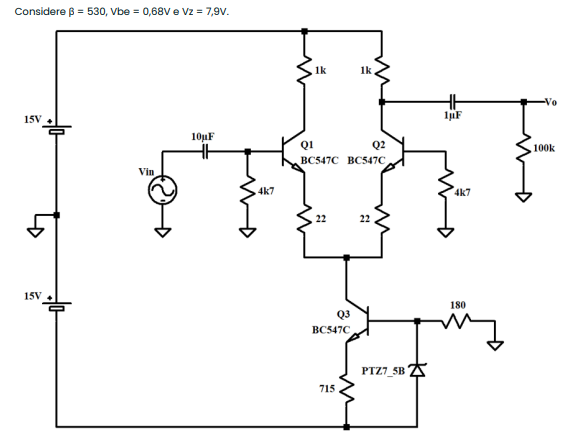

In [ ]:
Vf = 15

Rb = 4.7e3
Rc = 1e3
Re = 22
Rl = 100e3

Rfe = 715
Rfb = 180

beta = 530
Vbe = 0.68
Vz = 7.9

If = (Vz - Vbe) / Rfe * beta/(beta+1)
print("If: ", If)

Ie = If/2
print("Ie: ", Ie)

Ic = Ie * beta / (beta + 1)
print("Ic: ", Ic)

re_linha = 26/(Ic*1e3)
print("re_linha: ", re_linha)

''' Desenvolvimento do ganho
Vin = 2*Ie*Re + 2*Ib**beta*re_linha + Ib*Rb

Ie = Ib * (beta + 1)

Vin = 2* Ib * (beta + 1) *Re + 2*Ib*re_linha*beta + Ib*Rb
Ib = Vin / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)

Ic = Ib * beta
Ic = beta * Vin / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)

Vo = -Ic * Rc
Vo = - beta * Vin * Rc / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)

Av = Vo / Vin
Av = - beta * Vin * Rc / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)  /  Vin
Av = - beta * Rc / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)
'''

Av = - beta * Rc / (2*(beta+1)*Re + 2*re_linha*beta + Rb)
print("Ganho de tensão: ", Av)

#Av = - Rc / (2*beta*(Re + re_linha) + Rb/beta)
#print("Ganho de tensão: ", Av)

If:  0.01007888533312262
Ie:  0.00503944266656131
Ic:  0.005029952190729744
re_linha:  5.169035214274656
Ganho de tensão:  -15.800530606601587


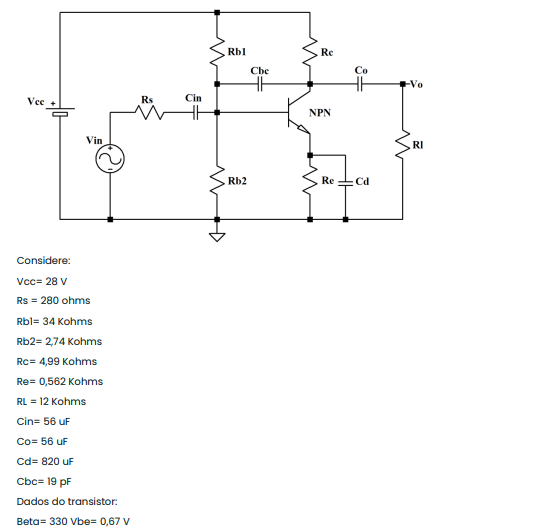

In [ ]:
def paralelo(R1, R2):
  return 1/(1/R1 + 1/R2)

Vf = 28
Rs = 280
Rb1 = 34e3
Rb2 = 2.74e3
Rc = 4.99e3
Re = 0.562e3
Rl = 12e3
Cin = 56e-6
Co = 56e-6
Cd = 820e-6
Cbc = 19e-12

beta = 330
Vbe = 0.67

print("Polarização DC transistor\n")

Vb = Vf * Rb2/(Rb1+Rb2)
Ie = (Vb - Vbe)/Re
Ic = beta/(beta+1) * Ie
re_linha = 26/(Ic*1e3)
print("re_linha: ", re_linha)


print("\nFrequencia de corte inferior\n")
#Malha de entrada
Zin = paralelo(paralelo(Rb1, Rb2), beta*re_linha)
print("Zin: ", Zin)
Rth_i = Rs + Zin
print("Rth_i: ", Rth_i)
fci = 1/(2*np.pi*Cin*Rth_i)
print("--------------")
print("fci_i: ", fci)
#Malha de saída
Rth_o = paralelo(Rc, Rl)
#Zin_o = paralelo(paralelo(paralelo(Rb1, Rb2), Rs), beta*re_linha)
#Rth_o = paralelo(paralelo(Rc, Rl), Zin_o)
fco = 1/(2*np.pi*Co*Rth_o)
print("fco: ", fco)
#Desvio
Rs_linha = paralelo(paralelo(Rb1, Rb2), Rs)
Rth_d = paralelo(Re, Rs_linha/beta + re_linha)
fcd = 1/(2*np.pi*Cd*Rth_d)
print("fcd: ", fcd)
print("--------------")
print("Pegar o maior dos três acima")

print("\nGanho do amplificador\n")


Av = - paralelo(Rc, Rl)/re_linha
print("Av: ", Av)


print("\nFrequencia de corte superior\n")
print("Entrou na margem de erro de menos de 1%, conferir se cair com ela")

Cmi = Cbc*(1-Av)
Ci = Cmi
Rth_i = paralelo(paralelo(paralelo(Rb1, Rb2), Rs), beta*re_linha)
#Rth_i = paralelo(paralelo(Rc, Rl), Zin_linha)
Fci = 1/(2*np.pi*Ci*Rth_i)
print("Fci: ", Fci)

Cmo = Cbc*(1-1/Av)
Co = Cmo
Rth_o = paralelo(Rc, Rl)
Fco = 1/(2*np.pi*Co*Rth_o)
print("Fco: ", Fco)

Polarização DC transistor

re_linha:  10.334515886755128

Frequencia de corte inferior

Zin:  1454.340590626546
Rth_i:  1734.340590626546
--------------
fci_i:  1.6386934438210317
fco:  0.8063873231973775
fcd:  17.83323733568732
--------------
Pegar o maior dos três acima

Ganho do amplificador

Av:  -341.0344685362941

Frequencia de corte superior

Entrou na margem de erro de menos de 1%, conferir se cair com ela
Fci:  104305.42286026856
Fco:  2369771.756624349


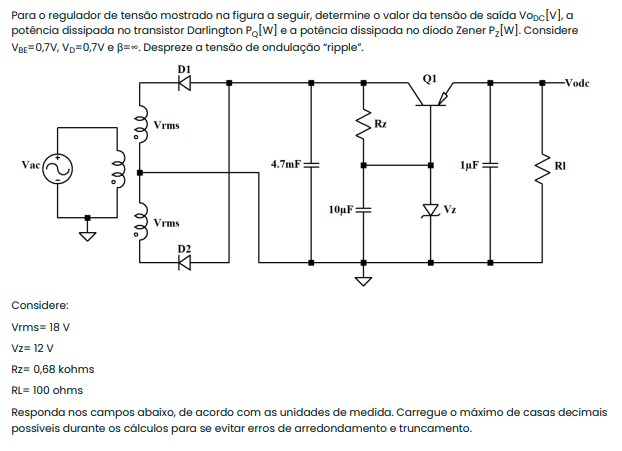

In [ ]:
import numpy as np

Vrms = 18
Vz = 12
Rz = 0.68e3
Rl = 100

Vbe = 0.7
Vd = 0.7

Vodc = -Vz + Vbe
print("Vodc: ", Vodc)

Il = Vodc/Rl
print("Il: ", Il)

Vidc = -(Vrms * np.sqrt(2) - Vd)
print("Vidc: ", Vidc)

Irz = (Vidc - (-Vz))/Rz
print("Irz: ", Irz)

Pq = (Vidc - Vodc) * Il
print("Pq: ", Pq)

Pz = -Vz * Irz
print("Pz: ", Pz)

Vodc:  -11.3
Il:  -0.113
Vidc:  -24.755844122715715
Irz:  -0.018758594298111345
Pq:  1.5205103858668758
Pz:  0.22510313157733614


# MINHA PROVA

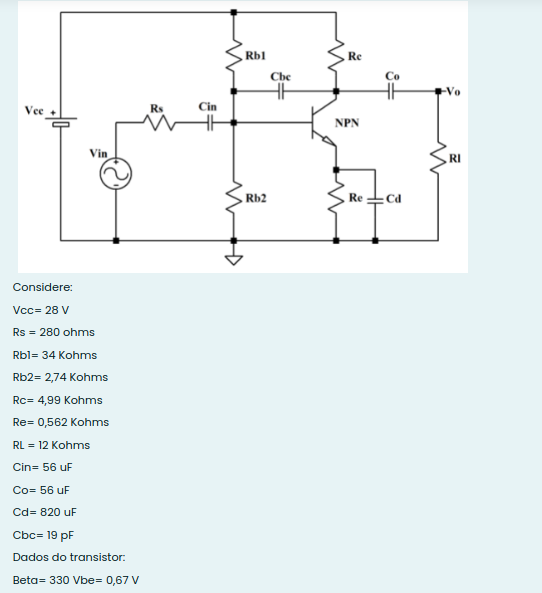

In [ ]:
def paralelo(R1, R2):
  return 1/(1/R1 + 1/R2)

Vf = 28
Rs = 280
Rb1 = 34e3
Rb2 = 2.74e3
Rc = 4.99e3
Re = 0.562e3
Rl = 12e3
Cin = 56e-6
Co = 56e-6
Cd = 820e-6
Cbc = 19e-12

beta = 330
Vbe = 0.67

print("Polarização DC transistor\n")

Vb = Vf * Rb2/(Rb1+Rb2)
Ie = (Vb - Vbe)/Re
Ic = beta/(beta+1) * Ie
re_linha = 26/(Ic*1e3)
print("re_linha: ", re_linha)


print("\nFrequencia de corte inferior\n")
#Malha de entrada
Zin = paralelo(paralelo(Rb1, Rb2), beta*re_linha)
print("Zin: ", Zin)
Rth_i = Rs + Zin
print("Rth_i: ", Rth_i)
fci = 1/(2*np.pi*Cin*Rth_i)
print("--------------")
print("fci_i: ", fci)
#Malha de saída
Rth_o = paralelo(Rc, Rl)
#Zin_o = paralelo(paralelo(paralelo(Rb1, Rb2), Rs), beta*re_linha)
#Rth_o = paralelo(paralelo(Rc, Rl), Zin_o)
fco = 1/(2*np.pi*Co*Rth_o)
print("fco: ", fco)
#Desvio
Rs_linha = paralelo(paralelo(Rb1, Rb2), Rs)
Rth_d = paralelo(Re, Rs_linha/beta + re_linha)
fcd = 1/(2*np.pi*Cd*Rth_d)
print("fcd: ", fcd)
print("--------------")
print("Pegar o maior dos três acima")

print("\nGanho do amplificador\n")


Av = - paralelo(Rc, Rl)/re_linha
print("Av: ", Av)


print("\nFrequencia de corte superior\n")
print("Entrou na margem de erro de menos de 1%, conferir se cair com ela")

Cmi = Cbc*(1-Av)
Ci = Cmi
Rth_i = paralelo(paralelo(paralelo(Rb1, Rb2), Rs), beta*re_linha)
#Rth_i = paralelo(paralelo(Rc, Rl), Zin_linha)
Fci = 1/(2*np.pi*Ci*Rth_i)
print("Fci: ", Fci)

Cmo = Cbc*(1-1/Av)
Co = Cmo
Rth_o = paralelo(Rc, Rl)
Fco = 1/(2*np.pi*Co*Rth_o)
print("Fco: ", Fco)

Polarização DC transistor

re_linha:  10.334515886755128

Frequencia de corte inferior

Zin:  1454.340590626546
Rth_i:  1734.340590626546
--------------
fci_i:  1.6386934438210317
fco:  0.8063873231973775
fcd:  17.83323733568732
--------------
Pegar o maior dos três acima

Ganho do amplificador

Av:  -341.0344685362941

Frequencia de corte superior

Entrou na margem de erro de menos de 1%, conferir se cair com ela
Fci:  104305.42286026856
Fco:  2369771.756624349


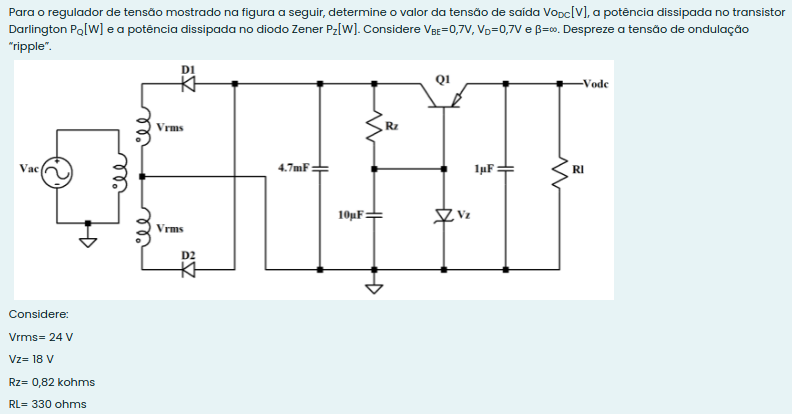

In [ ]:
Vrms = 24
Vz = 18
Rz = 0.82e3
Rl = 330

Vbe = 0.7
Vd = 0.7

Vodc = -Vz + Vbe
print("Vodc: ", Vodc)

Il = Vodc/Rl
print("Il: ", Il)

Vidc = -(Vrms * np.sqrt(2) - Vd)
print("Vidc: ", Vidc)

Irz = (Vidc - (-Vz))/Rz
print("Irz: ", Irz)

Pq = (Vidc - Vodc) * Il
print("Pq: ", Pq)

Pz = -Vz * Irz
print("Pz: ", Pz)

Vodc:  -17.3
Il:  -0.05242424242424243
Vidc:  -33.24112549695428
Irz:  -0.018586738410919856
Pq:  0.8357014275676033
Pz:  0.3345612913965574


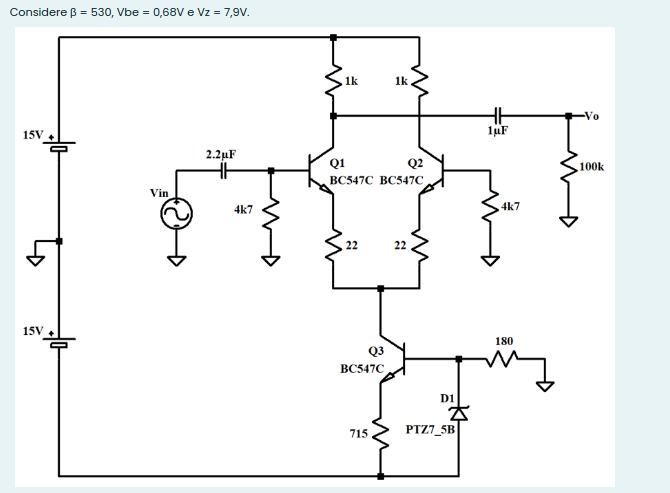

In [ ]:
Vf = 15

Rb = 4.7e3
Rc = 1e3
Re = 22
Rl = 100e3

Rfe = 715
Rfb = 180

beta = 580
Vbe = 0.65
Vz = 6.5

If = (Vz - Vbe) / Rfe * beta/(beta+1)
print("If: ", If)

Ie = If/2
print("Ie: ", Ie)

Ic = Ie * beta / (beta + 1)
print("Ic: ", Ic)

re_linha = 26/(Ic*1e3)
print("re_linha: ", re_linha)

''' Desenvolvimento do ganho
Vin = 2*Ie*Re + 2*Ib**beta*re_linha + Ib*Rb

Ie = Ib * (beta + 1)

Vin = 2* Ib * (beta + 1) *Re + 2*Ib*re_linha*beta + Ib*Rb
Ib = Vin / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)

Ic = Ib * beta
Ic = beta * Vin / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)

Vo = -Ic * Rc
Vo = - beta * Vin * Rc / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)

Av = Vo / Vin
Av = - beta * Vin * Rc / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)  /  Vin
Av = - beta * Rc / (2*(beta + 1)*Re + 2*re_linha*beta + Rb)
'''

Av = - beta * Rc / (2*(beta+1)*Re + 2*re_linha*beta + Rb)
print("Ganho de tensão: ", Av)

#Av = - Rc / (2*beta*(Re + re_linha) + Rb/beta)
#print("Ganho de tensão: ", Av)